In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
combined_df = pd.merge(mouse_drug, clinical_trial, on="Mouse ID", how = "outer")


# Display the data table for preview
combined_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_time_tv = combined_df.groupby(['Drug','Timepoint'])
drugtime=drug_time_tv['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
combined_tvmean_summary = pd.DataFrame({"Tumor Volume (mm3)": drugtime})
combined_tvmean_sorted = combined_tvmean_summary.sort_values(["Drug","Timepoint"], ascending=True).reset_index()
# Preview DataFrame
combined_tvmean_sorted.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_time_tv = combined_df.groupby(['Drug','Timepoint'])
drugtime=drug_time_tv['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
combined_tvsem_summary = pd.DataFrame({"Tumor Volume (mm3)": drugtime})
combined_tvsem_sorted = combined_tvsem_summary.sort_values(["Drug","Timepoint"], ascending=True).reset_index()
# Preview DataFrame
combined_tvsem_sorted.head(20)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [4]:
# Minor Data Munging to Re-Format the Data Frames
reformated_tvmean_summary=combined_tvmean_sorted.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
reformated_tvmean_summary.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the Data Frames
reformated_tvsem_summary=combined_tvsem_sorted.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
reformated_tvsem_summary.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


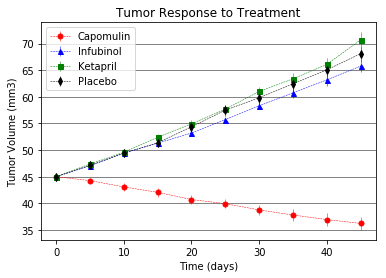

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate the Plot (with Error Bars)
chart_df = reformated_tvmean_summary
error_df = reformated_tvsem_summary

time= chart_df.index
drug1 = chart_df['Capomulin']
drug2 = chart_df['Infubinol']
drug3 = chart_df['Ketapril']
drug4 = chart_df['Placebo']

err1 =error_df['Capomulin']
err2 =error_df['Infubinol']
err3 =error_df['Ketapril']
err4 =error_df['Placebo']

#Plot drug mean series

plt.errorbar(time, drug1, yerr=err1, color="red", marker="o", markersize=5, ls="dashed", lw=0.50)
plt.errorbar(time, drug2, yerr=err2, color="blue", marker="^", markersize=5, ls="dashed", lw=0.50)
plt.errorbar(time, drug3, yerr=err3, color="green", marker="s", markersize=5, ls="dashed", lw=0.50)
plt.errorbar(time, drug4, yerr=err4, color="black", marker="d", markersize=5, ls="dashed", lw=0.50)

#Format Chart

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (days)")
plt.grid(b=True, which='major', axis = 'y', color='#666666', linestyle='-')
plt.legend(loc=0)

# Save the Figure
plt.savefig("chart1_Tumor Response to Treatment.png")

#Show the Figure
plt.show()
plt.tight_layout()


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_time_met = combined_df.groupby(['Drug','Timepoint'])
drugtime=drug_time_met['Metastatic Sites'].mean()

# Convert to DataFrame
combined_metmean_summary = pd.DataFrame({"Metastatic Sites": drugtime})
combined_metmean_sorted = combined_metmean_summary.sort_values(["Drug","Timepoint"], ascending=True).reset_index()
# Preview DataFrame
combined_metmean_sorted.head(20)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
drug_time_met = combined_df.groupby(['Drug','Timepoint'])
drugtime=drug_time_met['Metastatic Sites'].sem()

# Convert to DataFrame
combined_metsem_summary = pd.DataFrame({"Metastatic Sites": drugtime})
combined_metsem_sorted = combined_metsem_summary.sort_values(["Drug","Timepoint"], ascending=True).reset_index()

# Preview DataFrame
combined_metsem_sorted.head(20)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [9]:
# Minor Data Munging to Re-Format the Data Frames
reformated_metmean_summary=combined_metmean_sorted.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
reformated_metmean_summary.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Minor Data Munging to Re-Format the Data Frames
reformated_metsem_summary=combined_metsem_sorted.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
reformated_metsem_summary.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


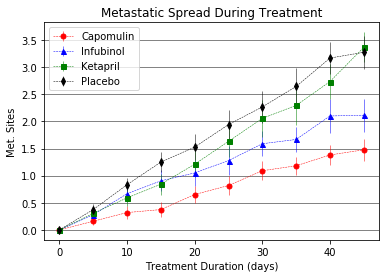

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate the Plot (with Error Bars)
chart2_df = reformated_metmean_summary
error2_df = reformated_metsem_summary

time= chart2_df.index
metdrug1 = chart2_df['Capomulin']
metdrug2 = chart2_df['Infubinol']
metdrug3 = chart2_df['Ketapril']
metdrug4 = chart2_df['Placebo']

meterr1 =error2_df['Capomulin']
meterr2 =error2_df['Infubinol']
meterr3 =error2_df['Ketapril']
meterr4 =error2_df['Placebo']

#Plot drug mean series

plt.errorbar(time, metdrug1, yerr=meterr1, color="red", marker="o", markersize=5, ls="dashed", lw=0.50)
plt.errorbar(time, metdrug2, yerr=meterr2, color="blue", marker="^", markersize=5, ls="dashed", lw=0.50)
plt.errorbar(time, metdrug3, yerr=meterr3, color="green", marker="s", markersize=5, ls="dashed", lw=0.50)
plt.errorbar(time, metdrug4, yerr=meterr4, color="black", marker="d", markersize=5, ls="dashed", lw=0.50)

#Format Chart

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (days)")
plt.grid(b=True, which='major', axis = 'y', color='#666666', linestyle='-')
plt.legend(loc=0)

# Save the Figure
plt.savefig("chart2_Metastatic Spread During Treatment.png")

#Show the Figure
plt.show()
plt.tight_layout()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
drug_time_mice = combined_df.groupby(['Drug','Timepoint'])
mousecount = drug_time_mice['Mouse ID'].nunique()

# Calculate Mouse Survival %

mousepercent = mousecount/25*100

# Convert to DataFrame
combined_mice_summary = pd.DataFrame({"Mouse Count": mousecount})
combined_mice_sorted = combined_mice_summary.sort_values(["Drug","Timepoint"], ascending=True).reset_index()

# Preview DataFrame
combined_mice_sorted.head(20)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [13]:
# Minor Data Munging to Re-Format the Data Frames
reformated_mice_summary=combined_mice_sorted.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview the Data Frame
reformated_mice_summary.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


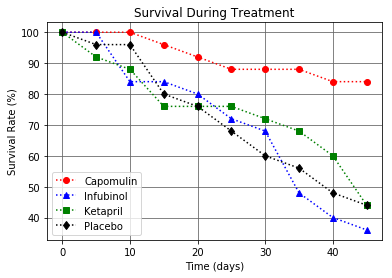

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate the Plot (Accounting for percentages)
# Convert to DataFrame & reformat
combined_mice_percent = pd.DataFrame({"Mouse Count": mousepercent})
combined_mice_percent = combined_mice_percent.sort_values(["Drug","Timepoint"], ascending=True).reset_index()
reformated_mice_percent=combined_mice_percent.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

chart3_df = reformated_mice_percent

time= chart_df.index
micedrug1 = chart3_df['Capomulin']
micedrug2 = chart3_df['Infubinol']
micedrug3 = chart3_df['Ketapril']
micedrug4 = chart3_df['Placebo']

#Plot drug mean series
plt.plot(time,micedrug1, label ='Capomulin', marker = 'o', ls=':', color='red')
plt.plot(time,micedrug2, label ='Infubinol', marker = '^', ls=':', color='blue')
plt.plot(time,micedrug3, label ='Ketapril', marker = 's', ls=':', color='green')
plt.plot(time,micedrug4, label ='Placebo', marker = 'd', ls=':', color='black')


#Format Chart
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (days)")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.legend(loc=0)

# Save the Figure
plt.savefig("chart3_Survival During Treatment.png")

#Show the Figure
plt.show()
plt.tight_layout()


## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
delta_df = combined_tvmean_sorted.pivot(index='Timepoint', columns ='Drug', values='Tumor Volume (mm3)')

delta_percent= ((delta_df.iloc[-1]-delta_df.iloc[0])/delta_df.iloc[0])*100

# Preview that Reformatting worked & display data
delta_percent


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

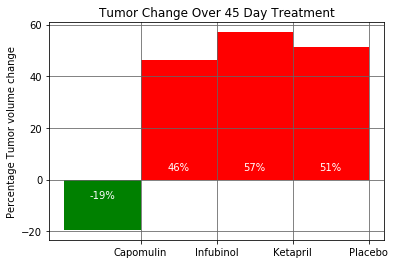

In [16]:
# Store all Relevant Percent Changes into a Tuple
#Percent_change=(tumor_pct_change["Capomulin"],tumor_pct_change["Infubinol"],tumor_pct_change["Ketapril"],tumor_pct_change["Placebo"])
drug_delta = delta_percent['Capomulin'],delta_percent['Infubinol'],delta_percent['Ketapril'],delta_percent['Placebo']
fig, ax=plt.subplots()


# Splice the data between passing and failing drugs
a= np.arange(0,len(drug_delta))
pa=ax.bar(a[0],drug_delta[0],width=-1,color='green', align='edge')
mi=ax.bar(a[1:],drug_delta[1:],width=-1,color='red', align='edge')

# Orient widths. Add labels, tick marks, etc. 
drug_list=['Capomulin','Infubinol','Ketapril','Placebo']
plt.xticks(a,drug_list)
plt.title("Tumor Change Over 45 Day Treatment")

plt.ylabel("Percentage Tumor volume change")
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='both')

# Use functions to label the percentages of changes
def label_failed (valueplus):
    for values in valueplus:
        height = values.get_height()
        ax.text(values.get_x() + values.get_width()/2., 3,
               '%d%%' % int(height),ha='center', va='bottom', color="white")
def label_passed (valueplus):
    for values in valueplus:
        height = values.get_height()
        ax.text(values.get_x() + values.get_width()/2., -8,
               '%d%%' % int(height),ha='center', va='bottom', color="white")

# Call functions to implement the function calls
label_failed(mi)
label_passed(pa)
plt.yticks(np.arange(round(min(drug_delta)-1,0), round(max(drug_delta)+20,0), 20.0))

# Save the Figure
plt.savefig("Chart4_Tumor Change over Treatment Period.png")


# Show the Figure
fig.show()


In [17]:
# Observations:
#1: Capomulin and Ramicane were the only drugs which produced a reduction of tumour size (mean) over the 45 day treatment study period.
#2: Capomulin and Ramicane showed a slower rate of metastatic spread (site increase) as compared to otherdrugs in the study over the 45 day treatment study period.
#3: Capomulin and Ramicane were the only drugs which produced a reduction of tumour size over the 45 day treatment study period and had a higher mouse survival rate.
#   compared to the other drugs in the study.
